In [75]:
import pandas as pd

# https://www.propertypriceregister.ie/website/npsra/pprweb.nsf/page/ppr-home-en

In [76]:
df = pd.read_csv("C:\\Users\\santi\\OneDrive\\Desktop\\PPR-ALL.csv", encoding="unicode_escape")
df = df.sample(100000)
df = df.reset_index()

C:\Users\santi\AppData\Local\Temp\ipykernel_10332\2076600314.py:1: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\santi\\OneDrive\\Desktop\\PPR-ALL.csv", encoding="unicode_escape")


In [77]:
df.head()

,index,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,291651,21/12/2017,"269 TIRELLAN HEIGHTS, GALWAY, GALWAY",Galway,NaN,"215,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,10099,12/07/2010,"5 Cherbury Mews, Booterstown Avenue",Dublin,NaN,"370,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
2,494445,01/09/2021,"23 LOWER ARD ODONNELL, LETTERKENNY, DONEGAL",Donegal,F92V8DW,"28,969.94",No,No,Second-Hand Dwelling house /Apartment,NaN
3,78973,02/08/2013,"113 Sandford Wood, Swords",Dublin,NaN,"250,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,264954,24/07/2017,"APT 3, MALT HOUSE, GEORGES QUAY",Waterford,NaN,"60,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [78]:
df.shape

(100000, 10)

In [79]:
df.isna().sum()


index                            0
Date of Sale (dd/mm/yyyy)        0
Address                          0
County                           0
Eircode                      84597
Price ()                        0
Not Full Market Price            0
VAT Exclusive                    0
Description of Property          0
Property Size Description    91101
dtype: int64

In [80]:
df.columns

Index(['index', 'Date of Sale (dd/mm/yyyy)', 'Address', 'County', 'Eircode',
       'Price ()', 'Not Full Market Price', 'VAT Exclusive',
       'Description of Property', 'Property Size Description'],
      dtype='object')

In [81]:
df['Price'] = df['Price ()']
df['Price'] = df['Price'].str[1:]
df['Price'] = df['Price'].str.replace(',', '')
df['Address'] = df['Address'].str.replace('\d+', '')
df['Address'] = df['Address'].str.replace(',', '')
df['Address'] = df['Address'].str.upper()

C:\Users\santi\AppData\Local\Temp\ipykernel_10332\2904156962.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Address'] = df['Address'].str.replace('\d+', '')


dropped eircode explain why

In [82]:
df = df[['Address', 'County','Price','Description of Property']]

In [83]:
df['Price'] = df['Price'].astype('float')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Address                  100000 non-null  object 
 1   County                   100000 non-null  object 
 2   Price                    100000 non-null  float64
 3   Description of Property  100000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.1+ MB


In [85]:
df.County.unique()

array(['Galway', 'Dublin', 'Donegal', 'Waterford', 'Meath', 'Mayo',
       'Roscommon', 'Cork', 'Westmeath', 'Limerick', 'Tipperary', 'Laois',
       'Kildare', 'Louth', 'Wexford', 'Clare', 'Carlow', 'Wicklow',
       'Monaghan', 'Kilkenny', 'Longford', 'Offaly', 'Cavan', 'Leitrim',
       'Sligo', 'Kerry'], dtype=object)

Data transformation address

In [86]:
df['Address'].sample(20)

77734      SKYLARK PARK VIEW ST. MARNOCK'S BAY PORTMARNOCK
89965                        THE PADDOCKS CLONTARF DUBLIN 
74528                               GLENN FIA MOGEELY CORK
28843               CROCKAUNADREENAGH RATHCOOLE CO. DUBLIN
35558                   BUSHY PARK HOUSE TERENURE DUBLIN W
51172                              THE WAY KILCOCK KILDARE
45721                  CHURCHFIELD GLEN ASHBOURNE CO MEATH
34882             HILLVIEW LAWNS POTTERY ROAD DUNLAOGHAIRE
68176                         HARBOUR COURT COURTMACSHERRY
24196    APARTMENT NO.A ABELARD SQUARE PHOENIX PARK RAC...
26354                       RIVER VIEW MAIN ST BALLINASLOE
14705                    ST IGNATIUS RD DRUMCONDRA DUBLIN 
47030                           CONVENT RD BALLINROBE MAYO
32144                              LAHINCH KILCOLLIN CLARA
5557                          WOODS PLACE OFF YORK ST CORK
66522         APT  WILLBROOK HOUSE NORTHBROOK AVE RANELAGH
79382                          GILROY AVE EDENDERRY OFFA

In [87]:
df['Address'] = df['Address'].str.replace('\d+', '')
df['Address'] = df['Address'].str.replace(',', '')
df['Address'] = df['Address'].str.upper()

C:\Users\santi\AppData\Local\Temp\ipykernel_10332\316044791.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Address'] = df['Address'].str.replace('\d+', '')


In [88]:
df['Address'].sample(4)

5286               ASHFIELD OLD GOLF LINKS ROAD KILKENNY
50530                         QUEEN ST CLONMEL TIPPERARY
3749     A FITZHAVEN SQ COURTBRACK AVE CIRCULAR RD SOUTH
45893                  OAK PARK PLACE CRADDOCKSTOWN NAAS
Name: Address, dtype: object

In [89]:
df.head()

,Address,County,Price,Description of Property
0,TIRELLAN HEIGHTS GALWAY GALWAY,Galway,215000.00,Second-Hand Dwelling house /Apartment
1,CHERBURY MEWS BOOTERSTOWN AVENUE,Dublin,370000.00,Second-Hand Dwelling house /Apartment
2,LOWER ARD ODONNELL LETTERKENNY DONEGAL,Donegal,28969.94,Second-Hand Dwelling house /Apartment
3,SANDFORD WOOD SWORDS,Dublin,250000.00,Second-Hand Dwelling house /Apartment
4,APT MALT HOUSE GEORGES QUAY,Waterford,60000.00,Second-Hand Dwelling house /Apartment


In [90]:
df['Description of Property'] = df['Description of Property'].str.replace('Second-Hand Dwelling house /Apartment', 'Second-Hand')
df['Description of Property'] = df['Description of Property'].str.replace('New Dwelling house /Apartment', 'New')
df['Description of Property'] = df['Description of Property'].str.replace('Teach/Árasán Cónaithe Atháimhe','Second-Hand')
df['Description of Property'] = df['Description of Property'].str.replace('Teach/Árasán Cónaithe Nua','New')
df = df[df['Description of Property'] != 'Teach/?ras?n C?naithe Nua']
df = df.dropna()

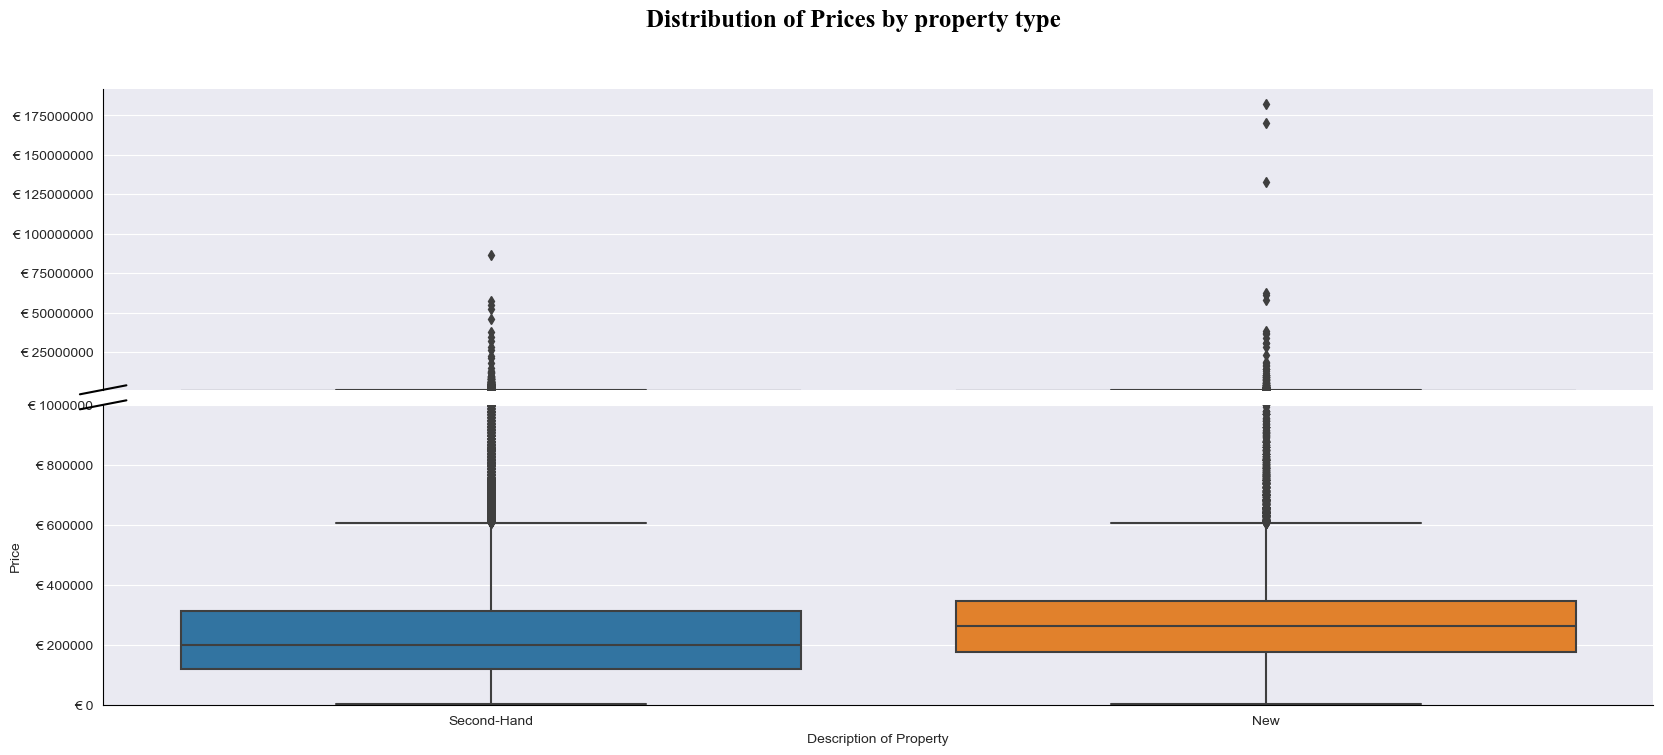

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

custom = {"axes.edgecolor": "black", "grid.color": "white"}
sns.set_style("darkgrid", rc = custom)

f, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, sharex=True, gridspec_kw={'hspace':0.05},figsize=(20, 8))
f.suptitle('Distribution of Prices by property type',fontsize=18,color= "black", weight='bold',fontname="Times New Roman")
a = sns.boxplot(data=df,x='Description of Property',y='Price',ax=ax_bottom)
b = sns.boxplot(data=df,x='Description of Property',y='Price',ax=ax_top)
ax_top.set_ylim(bottom=1e6) 
ax_bottom.set_ylim(0,1e6)

sns.despine(ax=ax_bottom)
sns.despine(ax=ax_top, bottom=True)

ax = ax_top
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)

ax2 = ax_bottom
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs) 

ax_top.set(xlabel=None,ylabel=None)
b.ticklabel_format(style='plain', axis='y')
a.ticklabel_format(style='plain', axis='y')
ax_top.yaxis.set_major_formatter('€ {x:1.0f}')
ax_bottom.yaxis.set_major_formatter('€ {x:1.0f}')
plt.show()



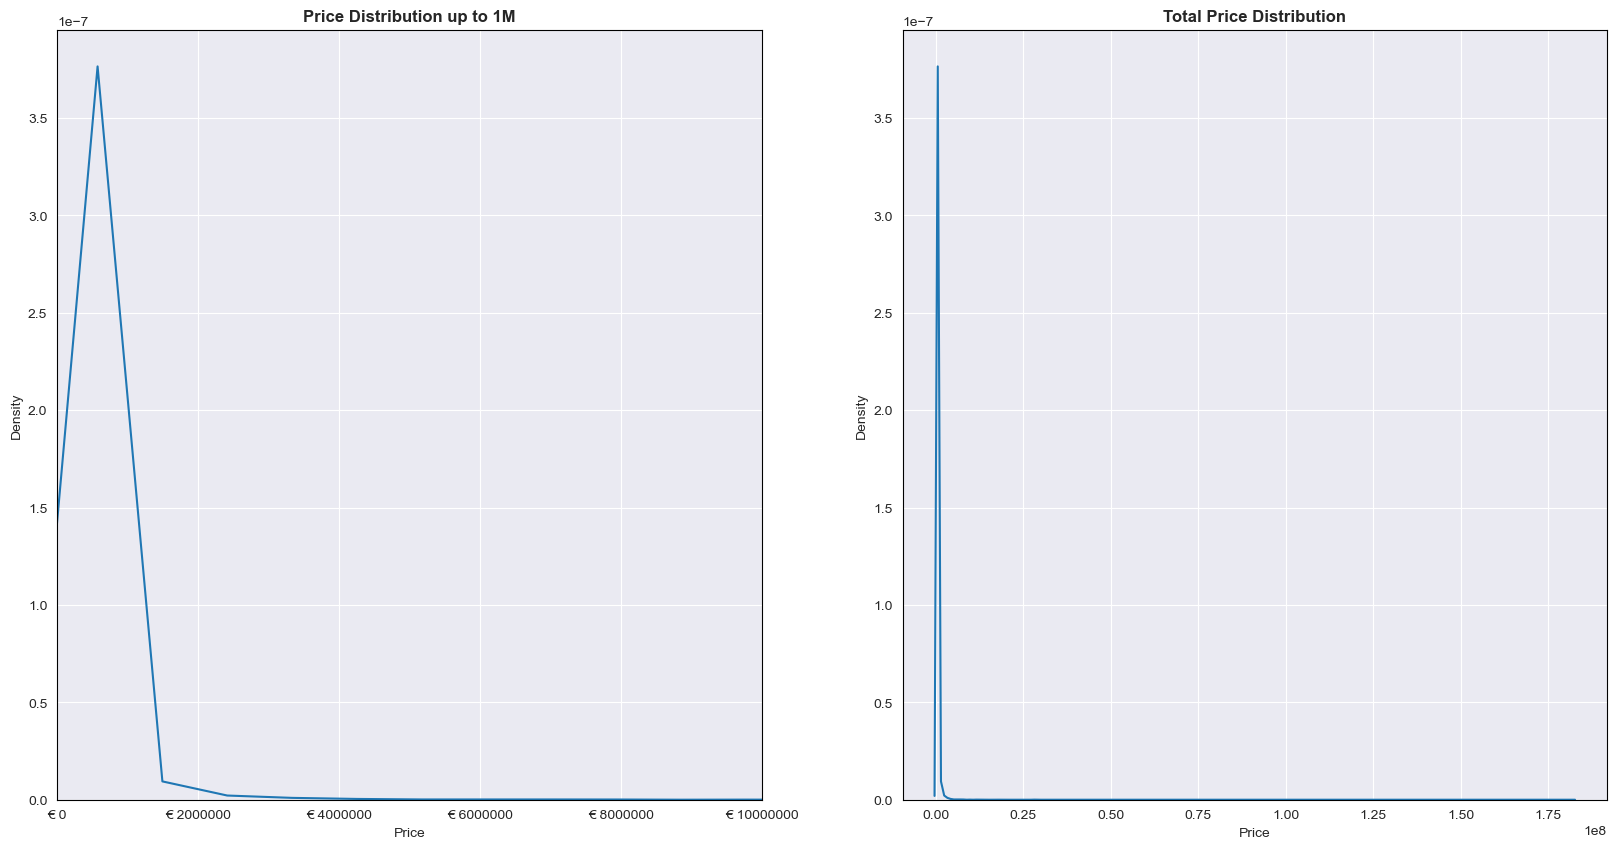

In [92]:
import seaborn as sns

f, axes = plt.subplots(ncols=2, nrows=1,figsize=(20, 10))

plott = sns.kdeplot(df['Price'], ax=axes[0])
plott.set_title('Price Distribution up to 1M', fontweight='bold')
plott.ticklabel_format(style='plain', axis='x')
plott.xaxis.set_major_formatter('€ {x:1.0f}')
plott.set_xlim([0, 10000000])

plott2 = sns.kdeplot(df['Price'], ax=axes[1])
plott2.set_title('Total Price Distribution', fontweight='bold')

plt.show()


In [93]:
from scipy.stats import shapiro,kstest,mannwhitneyu
for x in [df[df['Description of Property'] == 'Second-Hand'],df[df['Description of Property'] == 'New'] ]:
    stat, p = kstest(x['Price'],'norm')
    stat, p2 = shapiro(x['Price'])
    if p>0.05 or p2>0.05:
        print('accept H0')
    else:
        print('reject H0')

    

reject H0
reject H0


c:\Users\santi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [94]:
secon = df[df['Description of Property'] == 'Second-Hand']
new = df[df['Description of Property'] == 'New']

In [95]:
mannwhitneyu(secon['Price'],new['Price'])

MannwhitneyuResult(statistic=543741982.5, pvalue=0.0)

In [96]:
secon = []
new = []

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Address                  100000 non-null  object 
 1   County                   100000 non-null  object 
 2   Price                    100000 non-null  float64
 3   Description of Property  100000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.8+ MB


In [98]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the text column
bag_of_words = vectorizer.fit_transform(df['Address'])
type(bag_of_words)

# Convert the bag_of_words to a DataFrame
bag_of_words_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the desired columns with the bag_of_words DataFrame
df = pd.concat([df, bag_of_words_df], axis=1)

In [99]:
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

scaler = RobustScaler()

# Select the column you want to scale
column_to_scale = df['Price']

# Reshape the column to match the expected input shape of the scaler
reshaped_column = column_to_scale.values.reshape(-1, 1)

# Apply the scaling transformation to the reshaped column
scaled_column = scaler.fit_transform(reshaped_column)

# Create a new column in the DataFrame with the scaled values
df['Price'] = scaled_column

In [100]:
# cleaning memory
reshaped_column = []
scaled_column = []
bag_of_words_df = []
x = []
column_to_scale = []
y = []

In [101]:
df.drop('Address', axis=1, inplace=True)

In [102]:
df = pd.get_dummies(df, columns=['County'])

In [103]:
df.head()

,Price,Description of Property,abbey,abbeyfeale,abbeylands,abbeyleix,abbeyside,abhainn,achill,adamstown,...,County_Meath,County_Monaghan,County_Offaly,County_Roscommon,County_Sligo,County_Tipperary,County_Waterford,County_Westmeath,County_Wexford,County_Wicklow
0,0.005089,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.793893,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,-0.941629,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.183206,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,-0.783715,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [104]:
df.shape

(100000, 1028)

X, Y PCA and train test split

In [105]:
X = df.drop('Description of Property', axis=1)

In [106]:
y = df['Description of Property']

In [107]:
#clean memory
df = []

In [108]:
X = X.dropna()

In [111]:
from sklearn.decomposition import PCA

for comp in range(X.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(X)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.80:
        break
        
Final_PCA = PCA(n_components= final_comp,random_state=42)
Final_PCA.fit(X)
cluster_df = Final_PCA.transform(X)
num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))


Using 1 components, we can explain 0.9504274187541073% of the variability in the original data.


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [124]:
Imp = {'value' : rf.feature_importances_, 'Feature': X.columns}
Imp = pd.DataFrame(Imp)
Imp.head()

,value,Feature
0,0.149407,Price
1,0.001837,abbey
2,0.000053,abbeyfeale
3,0.000107,abbeylands
4,0.000166,abbeyleix


0.3620240850917953


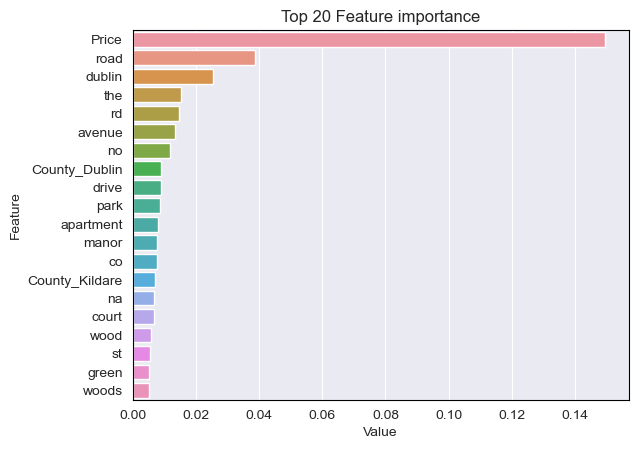

In [131]:
sorted_Imp = Imp.sort_values('value', ascending=False)

# Select the top 10 rows
top_20 = sorted_Imp.head(20)
print(top_20['value'].sum())
# Create the bar plot
sns.barplot(data=top_20, x='value', y='Feature')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.title('Top 20 Feature importance')
plt.show()